In [1]:
# import required modules
from dataset import AngioDataset
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from unet import UNet
from run_training import run_training
from torch.utils.tensorboard import SummaryWriter
from metric import DiceCoefficient
from utils import *
from test import *

%load_ext autoreload
%autoreload 2

%matplotlib inline
%load_ext tensorboard

In [2]:
patch_size = [1,128,128]
final_activation = "Sigmoid"
batch_size = 10

model = UNet(depth=4, in_channels=1, out_channels=1, final_activation=final_activation)

# set loss function
loss_function = nn.BCELoss()

# set optimizer
lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# set metrics
dice = DiceCoefficient()
n_epochs = 3

modelnum = '007'


In [3]:
device = torch.device("cuda") if torch.cuda.is_available else torch.device("cpu")


In [4]:
train_dataset = AngioDataset('train',patch_size=patch_size)
val_dataset = AngioDataset('val',patch_size=patch_size)


# pass data to DataLoader
train_loader = DataLoader(train_dataset, batch_size= batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# pass to device

model = model.to(device)


# set logger's parameters
logger = SummaryWriter("runs")
log_interval=1

# model's training


checkpoint_path = '/group/dl4miacourse/The_Segmenters/Checkpoints'
run_training(model, optimizer, dice, n_epochs,
             train_loader, val_loader, loss_function, log_interval, logger, device=device, 
             path = '/group/dl4miacourse/The_Segmenters/Checkpoints',
             key = 'checkpoint' + modelnum)

Train Epoch: 0 [0/1344 (0%)]	Loss: 0.709447
Train Epoch: 0 [10/1344 (1%)]	Loss: 0.351182
Train Epoch: 0 [20/1344 (1%)]	Loss: 1.968337
Train Epoch: 0 [30/1344 (2%)]	Loss: 3.194155
Train Epoch: 0 [40/1344 (3%)]	Loss: 2.454224
Train Epoch: 0 [50/1344 (4%)]	Loss: 2.259521
Train Epoch: 0 [60/1344 (4%)]	Loss: 3.511963
Train Epoch: 0 [70/1344 (5%)]	Loss: 1.094971
Train Epoch: 0 [80/1344 (6%)]	Loss: 2.454224
Train Epoch: 0 [90/1344 (7%)]	Loss: 2.668457
Train Epoch: 0 [100/1344 (7%)]	Loss: 2.937012
Train Epoch: 0 [110/1344 (8%)]	Loss: 2.454834
Train Epoch: 0 [120/1344 (9%)]	Loss: 2.927856
Train Epoch: 0 [130/1344 (10%)]	Loss: 2.748413
Train Epoch: 0 [140/1344 (10%)]	Loss: 3.454590
Train Epoch: 0 [150/1344 (11%)]	Loss: 2.911377
Train Epoch: 0 [160/1344 (12%)]	Loss: 2.590332
Train Epoch: 0 [170/1344 (13%)]	Loss: 2.385864
Train Epoch: 0 [180/1344 (13%)]	Loss: 1.670532
Train Epoch: 0 [190/1344 (14%)]	Loss: 1.938477
Train Epoch: 0 [200/1344 (15%)]	Loss: 3.293457
Train Epoch: 0 [210/1344 (16%)]	Loss:

: 

In [5]:
%tensorboard --logdir runs

Reusing TensorBoard on port 6006 (pid 62994), started 6:19:24 ago. (Use '!kill 62994' to kill it.)

MSE loss: 0.02368164
Image size is {torch.Size([128, 128])}


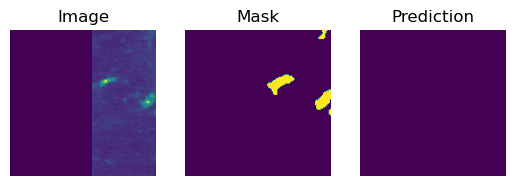

In [6]:
# show results on random image
show_random_dataset_image_with_prediction(train_dataset, model, device)

In [1]:
test_dataset = AngioDataset('test', patch_size=[1,512, 512])
test_dataloader = DataLoader(test_dataset, batch_size=1)

NameError: name 'AngioDataset' is not defined

In [ ]:
show_output_histogram(train_dataset, model, device)

In [ ]:
dataset = AngioDataset('train',patch_size=patch_size)

In [ ]:
x,y = train_dataset[50]

In [ ]:
np.mean(x[0].numpy())

In [ ]:
np.std(x[0].numpy())

In [ ]:
fig, ax = plt.subplots()
pos = ax.imshow(x[0])
fig.colorbar(pos , ax= ax)

In [ ]:
show_output_histogram(train_dataset,model,device)